In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Positive Pion Decay (s-channel)

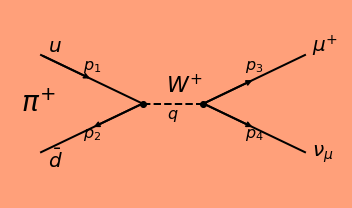

In [31]:
fig, ax = plt.subplots(figsize=(5,3))
fig.patch.set_facecolor("lightsalmon")
ax.set_facecolor("lightsalmon")
def centered_arrow(x0, y0, x1, y1, reverse=False):
    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2
    if reverse:
        ax.annotate(
            "", xy=(xm, ym), xytext=(x1, y1),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black")
        )
    else:
        ax.annotate(
            "", xy=(xm, ym), xytext=(x0, y0),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black")
        )
    ax.plot([x0, x1], [y0, y1], color="black", linewidth=2)
    return xm, ym

L = 0.30      
H = 0.25     
G = 0.18     
x_left  = 0.10
x_v1    = x_left + L
x_v2    = x_v1 + G
x_right = x_v2 + L
y_mid = 0.50
y_top = y_mid + H
y_bot = y_mid - H

xm1, ym1 = centered_arrow(x_left, y_top, x_v1, y_mid)              
xm2, ym2 = centered_arrow(x_left, y_bot, x_v1, y_mid, reverse=True)   
xm3, ym3 = centered_arrow(x_v2, y_mid, x_right, y_top)               
xm4, ym4 = centered_arrow(x_v2, y_mid, x_right, y_bot)  

ax.plot(
    [x_v1, x_v2],
    [y_mid, y_mid],
    linestyle='dashed',
    color='black',
    linewidth=2
)
xq = (x_v1 + x_v2) / 2
yq = y_mid
ax.text(xq, yq - 0.06, r"$q$", fontsize=16, ha='center', va='center')
ax.text(xm1, ym1 + 0.05, r"$p_1$", fontsize=16, ha='center')
ax.text(xm2, ym2 - 0.05, r"$p_2$", fontsize=16, ha='center')
ax.text(xm3, ym3 + 0.05, r"$p_3$", fontsize=16, ha='center')
ax.text(xm4, ym4 - 0.05, r"$p_4$", fontsize=16, ha='center')
ax.text(x_left - 0.06, y_mid, r"$\pi^{+}$", fontsize=28, va='center')
ax.text(x_left + 0.02, y_top + 0.02, r"$u$", fontsize=20)
ax.text(x_left + 0.02, y_bot - 0.07, r"$\bar{d}$", fontsize=20)
ax.text((x_v1 + x_v2)/2 - 0.02, y_mid + 0.06, r"$W^{+}$", fontsize=22)
ax.text(x_right + 0.02, y_top + 0.02, r"$\mu^{+}$", fontsize=20)
ax.text(x_right + 0.02, y_bot - 0.02, r"$\nu_{\mu}$", fontsize=20)
ax.scatter([x_v1, x_v2], [y_mid, y_mid], color='black')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.savefig("feynmandiagram.png", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
u = np.array([1/2, 2/3, 1/3, 0])
dbar = np.array([1/2, 1/3, -1/3, 0])
mu_plus = np.array([1/2, 1, 0, -1])
nu_mu = np.array([1/2, 0, 0, 1])

incoming_v1 = u + dbar    
print("Vertex 1 (u + d̄ → W⁺):")
print("Incoming Quantum Numbers:", incoming_v1)
outgoing_v2 = mu_plus + nu_mu
print("\nVertex 2 (W⁺ → μ⁺ + νμ):")
print("Outgoing Quantum Numbers:", outgoing_v2)
print("\nQuantum number Conservation Check:")
labels = ["Spin", "Charge", "Baryon Number", "Lepton Number"]

for i, label in enumerate(labels):
    q1 = incoming_v1[i]
    q2 = outgoing_v2[i]
    conserved = (abs(q1 - q2) < 1e-12)
    print(f"{label:10s}:  Vertex 1={q1:6.3f},  Vertex 2={q2:6.3f},  Conserved? {conserved}")

Vertex 1 (u + d̄ → W⁺):
Incoming Quantum Numbers: [1. 1. 0. 0.]

Vertex 2 (W⁺ → μ⁺ + νμ):
Outgoing Quantum Numbers: [1. 1. 0. 0.]

Quantum number Conservation Check:
Spin      :  Vertex 1= 1.000,  Vertex 2= 1.000,  Conserved? True
Charge    :  Vertex 1= 1.000,  Vertex 2= 1.000,  Conserved? True
Baryon Number:  Vertex 1= 0.000,  Vertex 2= 0.000,  Conserved? True
Lepton Number:  Vertex 1= 0.000,  Vertex 2= 0.000,  Conserved? True


In [41]:
GF = 1.1663787e-5        
Vud = 0.97420
f_pi = 0.1304            
m_pi = 0.13957           
m_mu = 0.10566           
hbar_GeV_s = 6.582119569e-25   

def invariant_amplitude(s):
    if s <= m_mu**2:
        return 0.0
    return np.sqrt(2.0) * GF * Vud * f_pi * m_mu * np.sqrt(s - m_mu**2)

def matrix_element_squared(s):
    M = invariant_amplitude(s)
    return np.abs(M)**2

def p_cm(s, m1, m2):
    lam = (s - (m1 + m2)**2)*(s - (m1 - m2)**2)
    if lam <= 0:
        return 0.0
    return np.sqrt(lam) / (2*np.sqrt(s))

def decay_rate():
    s = m_pi**2                 
    M2 = matrix_element_squared(s)
    p_f = p_cm(s, m_mu, 0.0)   
    Gamma_GeV = (p_f / (8.0 * np.pi * s)) * M2
    return Gamma_GeV

Gamma_GeV = decay_rate()
Gamma_s   = Gamma_GeV / hbar_GeV_s
tau       = 1.0 / Gamma_s

print("========== Results ==========")
s = m_pi**2
M_val  = invariant_amplitude(s)
M2_val = matrix_element_squared(s)
print(f"s = {s:.6e} GeV^2")
print(f"M(s) = {M_val:.6e}")
print(f"|M|² = {M2_val:.6e} GeV^4\n")
print(f"Γ (GeV) = {Gamma_GeV:.6e}")
print(f"Γ (s^-1) = {Gamma_s:.6e}")
print(f"τ (s) = {tau:.6e}")

========== Results ==========
s = 1.947978e-02 GeV^2
M(s) = 2.019025e-08
|M|² = 4.076460e-16 GeV^4

Γ (GeV) = 2.480496e-17
Γ (s^-1) = 3.768536e+07
τ (s) = 2.653550e-08


# Negative Pion Decay (s-channel)

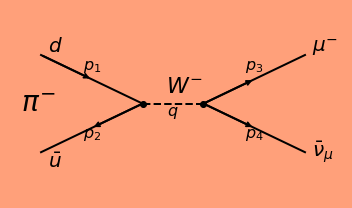

In [38]:
fig, ax = plt.subplots(figsize=(5,3))
fig.patch.set_facecolor("lightsalmon")
ax.set_facecolor("lightsalmon")

def centered_arrow(x0, y0, x1, y1, reverse=False):
    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2
    if reverse:
        ax.annotate(
            "", xy=(xm, ym), xytext=(x1, y1),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black")
        )
    else:
        ax.annotate(
            "", xy=(xm, ym), xytext=(x0, y0),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black")
        )
    ax.plot([x0, x1], [y0, y1], color="black", linewidth=2)
    return xm, ym

L = 0.30      
H = 0.25     
G = 0.18     
x_left  = 0.10
x_v1    = x_left + L
x_v2    = x_v1 + G
x_right = x_v2 + L
y_mid = 0.50
y_top = y_mid + H
y_bot = y_mid - H

xm1, ym1 = centered_arrow(x_left, y_top, x_v1, y_mid)               
xm2, ym2 = centered_arrow(x_left, y_bot, x_v1, y_mid, reverse=True)
xm3, ym3 = centered_arrow(x_v2, y_mid, x_right, y_top)          
xm4, ym4 = centered_arrow(x_v2, y_mid, x_right, y_bot)  

ax.plot([x_v1, x_v2],[y_mid, y_mid],
        linestyle='dashed', color='black', linewidth=2)
xq = (x_v1 + x_v2) / 2
yq = y_mid
ax.text(xq, yq - 0.06, r"$q$", fontsize=16, ha='center')
ax.text(xm1, ym1 + 0.05, r"$p_1$", fontsize=16, ha='center')
ax.text(xm2, ym2 - 0.05, r"$p_2$", fontsize=16, ha='center')
ax.text(xm3, ym3 + 0.05, r"$p_3$", fontsize=16, ha='center')
ax.text(xm4, ym4 - 0.05, r"$p_4$", fontsize=16, ha='center')
ax.text(x_left - 0.06, y_mid, r"$\pi^{-}$", fontsize=28, va='center')
ax.text(x_left + 0.02, y_top + 0.02, r"$d$", fontsize=20)
ax.text(x_left + 0.02, y_bot - 0.07, r"$\bar{u}$", fontsize=20)
ax.text((x_v1 + x_v2)/2 - 0.02, y_mid + 0.06, r"$W^{-}$", fontsize=22)
ax.text(x_right + 0.02, y_top + 0.02, r"$\mu^{-}$", fontsize=20)
ax.text(x_right + 0.02, y_bot - 0.02, r"$\bar{\nu}_{\mu}$", fontsize=20)
ax.scatter([x_v1, x_v2],[y_mid, y_mid], color='black')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.show()

In [39]:
d = np.array([1/2, -1/3, 1/3, 0])
ubar = np.array([1/2, -2/3, -1/3, 0])
mu_minus = np.array([1/2, -1, 0, 1])
nu_mu_bar = np.array([1/2, 0, 0, -1])

incoming_v1 = d + ubar
print("Vertex 1 (d + ū → W⁻):")
print("Incoming Quantum Numbers:", incoming_v1)
outgoing_v2 = mu_minus + nu_mu_bar
print("\nVertex 2 (W⁻ → μ⁻ + ν̄μ):")
print("Outgoing Quantum Numbers:", outgoing_v2)
print("\nQuantum number Conservation Check:")
labels = ["Spin", "Charge", "Baryon Number", "Lepton Number"]

for i, label in enumerate(labels):
    q1 = incoming_v1[i]
    q2 = outgoing_v2[i]
    conserved = (abs(q1 - q2) < 1e-12)
    print(f"{label:10s}:  Vertex 1={q1:6.3f},  Vertex 2={q2:6.3f},  Conserved? {conserved}")

Vertex 1 (d + ū → W⁻):
Incoming Quantum Numbers: [ 1. -1.  0.  0.]

Vertex 2 (W⁻ → μ⁻ + ν̄μ):
Outgoing Quantum Numbers: [ 1. -1.  0.  0.]

Quantum number Conservation Check:
Spin      :  Vertex 1= 1.000,  Vertex 2= 1.000,  Conserved? True
Charge    :  Vertex 1=-1.000,  Vertex 2=-1.000,  Conserved? True
Baryon Number:  Vertex 1= 0.000,  Vertex 2= 0.000,  Conserved? True
Lepton Number:  Vertex 1= 0.000,  Vertex 2= 0.000,  Conserved? True


In [40]:
GF = 1.1663787e-5           
Vud = 0.97420               
f_pi = 0.1304               
m_pi = 0.13957              
m_mu = 0.10566              
hbar_GeV_s = 6.582119569e-25  

def invariant_amplitude(s):
    if s <= m_mu**2:
        return 0.0
    return np.sqrt(2.0) * GF * Vud * f_pi * m_mu * np.sqrt(s - m_mu**2)

def matrix_element_squared(s):
    M = invariant_amplitude(s)
    return np.abs(M)**2

def p_cm(s, m1, m2):
    lam = (s - (m1 + m2)**2)*(s - (m1 - m2)**2)
    if lam <= 0:
        return 0.0
    return np.sqrt(lam) / (2*np.sqrt(s))

def decay_rate():
    s = m_pi**2
    M2 = matrix_element_squared(s)
    p_f = p_cm(s, m_mu, 0.0)   
    Gamma_GeV = (p_f / (8.0 * np.pi * s)) * M2
    return Gamma_GeV

Gamma_GeV = decay_rate()
Gamma_s   = Gamma_GeV / hbar_GeV_s
tau       = 1.0 / Gamma_s

print("========== Results ==========")
s = m_pi**2
M_val  = invariant_amplitude(s)
M2_val = matrix_element_squared(s)
print(f"s = {s:.6e} GeV^2")
print(f"M(s) = {M_val:.6e}")
print(f"|M|² = {M2_val:.6e} GeV^4\n")
print(f"Γ (GeV) = {Gamma_GeV:.6e}")
print(f"Γ (s^-1) = {Gamma_s:.6e}")
print(f"τ (s) = {tau:.6e}")

========== Results ==========
s = 1.947978e-02 GeV^2
M(s) = 2.019025e-08
|M|² = 4.076460e-16 GeV^4

Γ (GeV) = 2.480496e-17
Γ (s^-1) = 3.768536e+07
τ (s) = 2.653550e-08
